# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [75]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/used_device_data.csv')
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [77]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


## Data Overview

- Observations
- Sanity checks

###Observations

* The dataset seems to have been loaded successfully, and displays information about various used or refurbished phones and tablets, inlcuding but not limited to size, model release year, RAM, which operating system the device runs on.
* This dataset appears to be hefty, with 3,454 rows and 15 columns — giving us a lot of information to work with to build an ML-based solution to develop a dynamic pricing strategy in this market
* Below, it can be observed that types of data include objects, floats, and integers — a good variety.
* When previewing the transposed statistical summary, the average normalized used price is about 4.36, which is not far from the average normalized new price of about 5.23.
* One interesting point is that the reported counts vary for some data columns, which could be indicative of missing data. And yes, it appears this set has data missing from about 6 columns.
* Luckily, we only have to take care of missing data and not duplicated, as there is no duplicate data.
* Something to note is the minimum and maximum years devices released, from 2013 to 2020 which is 7 whole years. Technology changes rapidly, so over the course of these 7 years, different improvements were probably implemented on the different devices. We are provided with a fantastic scope of data to learn from.
* Laslty, data types of each column are stored in a preferred and expected format following logically what each observation represents (categorical, numerical).

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [80]:
df.shape

(3454, 15)

In [81]:
df.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [82]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

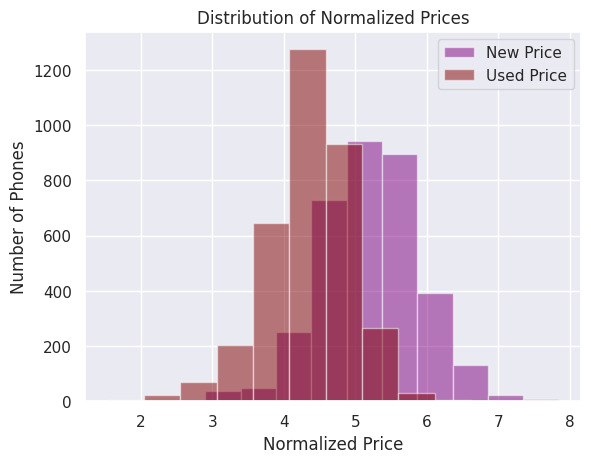

In [83]:
plt.hist(df['normalized_new_price'], alpha=0.5, label='New Price', color= 'purple')
plt.hist(df['normalized_used_price'], alpha=0.5, label='Used Price', color= 'maroon')
plt.xlabel('Normalized Price')
plt.ylabel('Number of Phones')
plt.title('Distribution of Normalized Prices')
plt.legend();

1. The distribution of the normalized price of used devices appeaars very normally distributed with no skew and no obvious outliers. It also is comparable to the normal distribution of the normalized price of new devices, which I plotted in search of interesting insights.

In [84]:
android_percentage = (df['os'] == 'Android').mean() * 100
print(f"The percentage of the used device market dominated by Android devices is {android_percentage:.2f}%")

The percentage of the used device market dominated by Android devices is 93.05%


2. "Dominated" seems to be the perfect terminology to describe the proportion of Android devices, as 93% is the majority of the products. This may be indicative that Android as an operating system of phones and tablets could have very long lasting lives, either performing well in the reselling space or quite the opposite - sellers are stuck with large inventory.

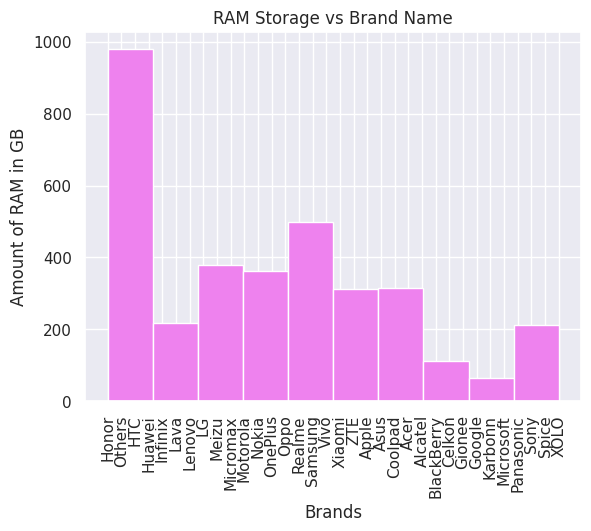

In [85]:
plt.hist(df['brand_name'], color='violet')
plt.xlabel('Brands')
plt.ylabel('Amount of RAM in GB')
plt.title('RAM Storage vs Brand Name')
plt.xticks(rotation=90)
plt.show()

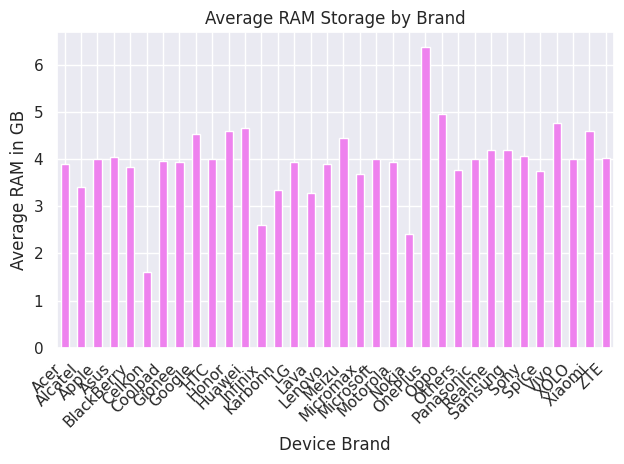

In [86]:
average_ram_by_brand = df.groupby('brand_name')['ram'].mean()
average_ram_by_brand.plot(kind='bar', color='violet')
plt.xlabel('Device Brand')
plt.ylabel('Average RAM in GB')
plt.title('Average RAM Storage by Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [87]:
print("Average RAM Storage by Brand:")
print(average_ram_by_brand)

Average RAM Storage by Brand:
brand_name
Acer          3.901961
Alcatel       3.407025
Apple         4.000000
Asus          4.049180
BlackBerry    3.829545
Celkon        1.613636
Coolpad       3.954545
Gionee        3.933036
Google        4.533333
HTC           4.000000
Honor         4.603448
Huawei        4.655378
Infinix       2.600000
Karbonn       3.353448
LG            3.936567
Lava          3.277778
Lenovo        3.885965
Meizu         4.451613
Micromax      3.679487
Microsoft     4.000000
Motorola      3.943396
Nokia         2.420294
OnePlus       6.363636
Oppo          4.961240
Others        3.777888
Panasonic     4.000000
Realme        4.195122
Samsung       4.199413
Sony          4.069767
Spice         3.750000
Vivo          4.756410
XOLO          4.000000
Xiaomi        4.583333
ZTE           4.023214
Name: ram, dtype: float64


3. Considering the number of observations we are working with, visualizing the data can prove to be a challenge. I plotted two histograms to check for trends, one to see RAM storage as compared to the brand of the device, and one looking at average RAM storage for a more condensed output. While informative, both plots are looking busy. I found it more productive to create a table using the newly user-defined variable of average RAM storage in GB alongside the brand name in order to make observations, such as the fact that OnePlus has the highest average RAM with a whopping 6.36 GB, and the weakest brand at 1.61 GB, Celkon. Generally, devices average 3 to 4 GB of RAM storage.

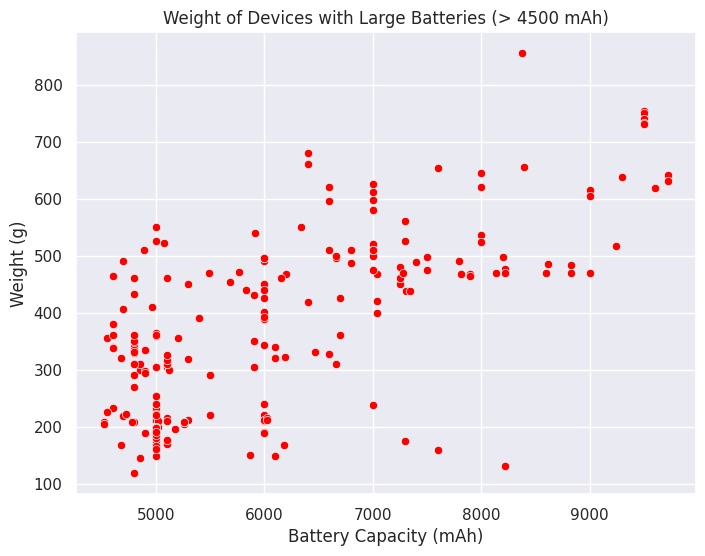

In [88]:
large_battery_phones = df[df['battery'] > 4500]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=large_battery_phones, x='battery', y='weight', color='red')
plt.title('Weight of Devices with Large Batteries (> 4500 mAh)')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight (g)')
plt.show()

4. After subsetting the dataframe to capture the weight of phones and tablets for those only with a battery capacity of greater than 4500 mAh, this is the resulting output. It may appear to have an ever so slight positive correlation, that is the higher the battery capacity the heavier the device. This must be taken with a grain of salt as there appear to be some outliers as well as congestion between the 5000-7000 mAh as there is a wide spread of data.

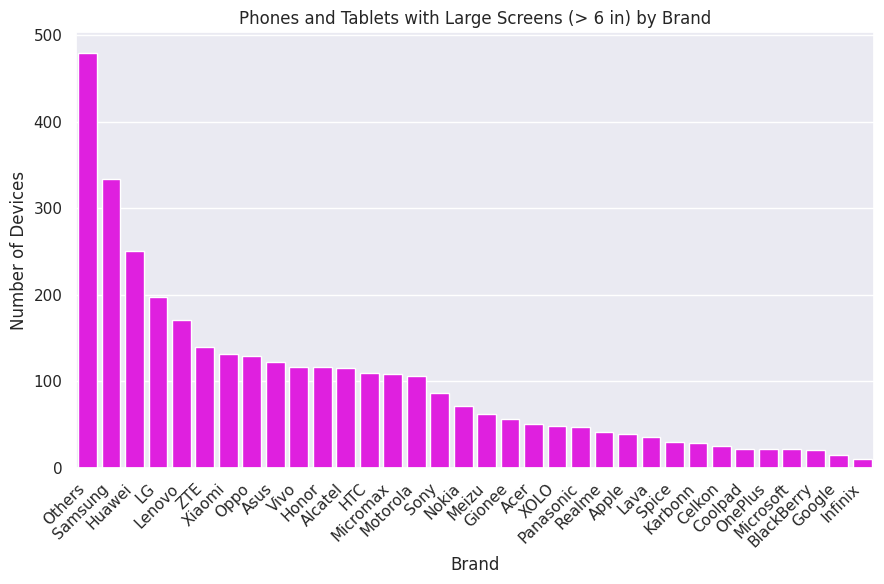

In [89]:
phones_with_large_screen = df[df['screen_size'] > 6]
phones_count_by_brand = phones_with_large_screen['brand_name'].value_counts()
plt.figure(figsize=(9, 6))
sns.barplot(x=phones_count_by_brand.index, y=phones_count_by_brand.values, color='magenta')
plt.title('Phones and Tablets with Large Screens (> 6 in) by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Devices')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

5. A larger watching, gaming, and texting experience can definitely be more appealing for consumers. According to the plot above, the top 3 brands for large screens is Others, Samsung, and Huawei. Having a 'large screen' is defined as a screen with measurments of more than 6 inches. It would be great to parce through and identify the exact names of the devices falling under the brand "Others" as they do take up the large majority. This histogram is majorly skewed, indicating that among the inventory, not every single brand can offer large screens.

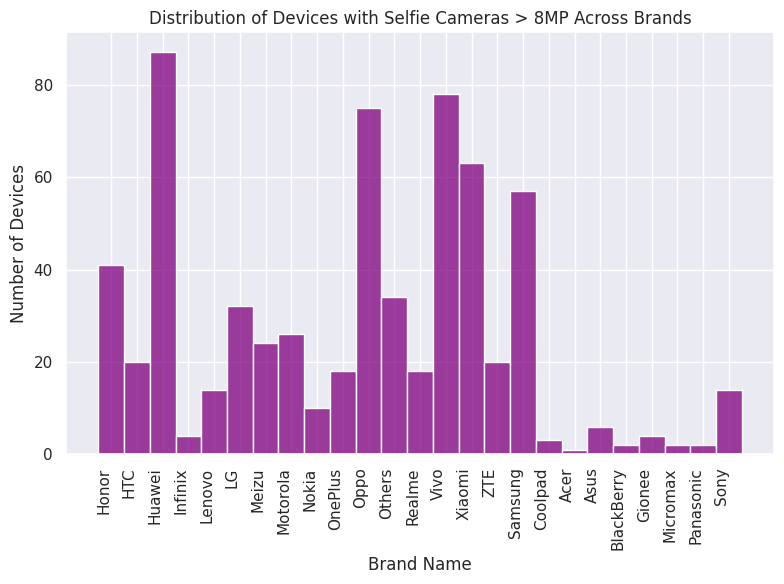

In [90]:
best_selfie_camera = df[df['selfie_camera_mp'] > 8]
plt.figure(figsize=(8, 6))
sns.histplot(data=best_selfie_camera, x='brand_name', color='purple', bins=20)
plt.title('Distribution of Devices with Selfie Cameras > 8MP Across Brands')
plt.xlabel('Brand Name')
plt.ylabel('Number of Devices')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

6. Analyzing the above histogram reveals a variety of brands offering high quality selfie camera, defined as a camera with resolution of greater than 8MP. Huawei is the winner of this race, logging the highest number of devices with crystal clear selfie cameras. No obvious distribution or symmetry can be observed within the plot.

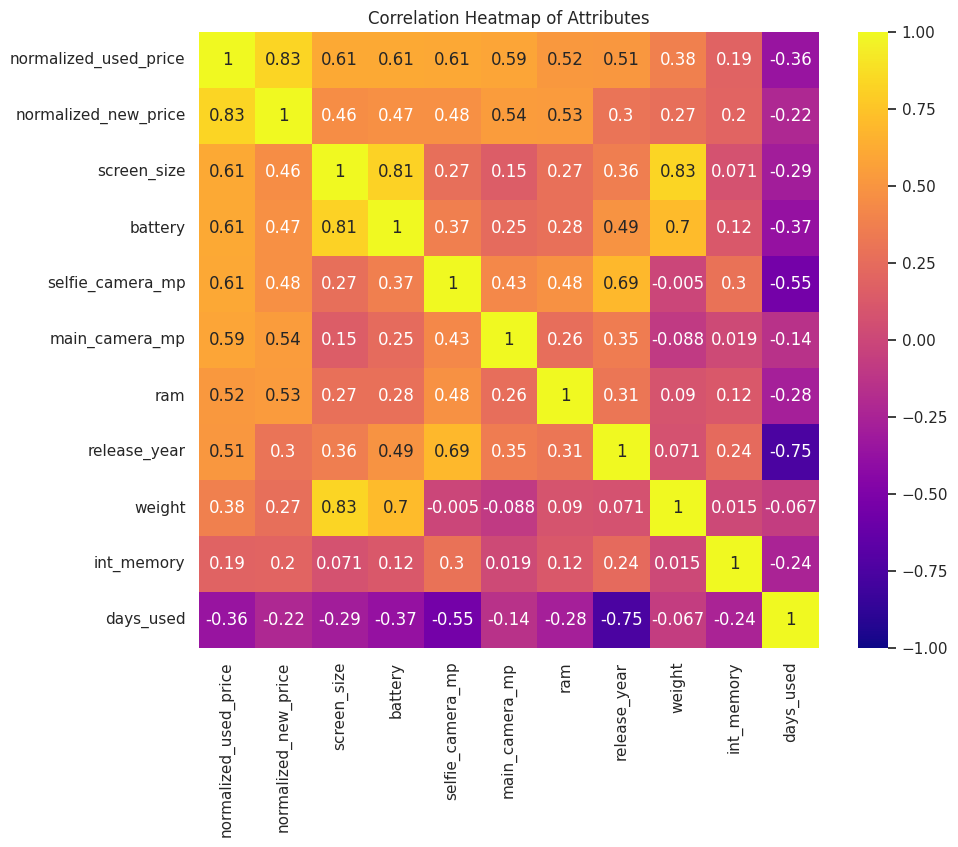

In [91]:
correlation_matrix = df.corr(numeric_only=True)
price_correlations = correlation_matrix['normalized_used_price']
sorted_correlations = price_correlations.sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(df[sorted_correlations.index].corr(), annot=True, cmap='plasma', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Attributes')
plt.show()

7. When looking at correlation relationships with the normalized price of a used device, we can see the top 3 attributes most highly correlated are `screen_size`, `battery`, and `selfie_camera_mp`, all at 0.61. Other observations that stick out to me are the correlation between `weight` and `screen_size` (0.83), `release_year` and `selfie_camera_mp` (0.69), and `normalized_new_price` and `main_camera_mp` (0.59). These all check out as the bigger the device's screen, the higher the weight, the newer the release year the higher the later the technology thus higher megapixels, and the better the main camera the higher the price for new devices. The most negatively correlated attributes, at -0.75, are reported as the `days_used` and `release_year`, which follows logically.

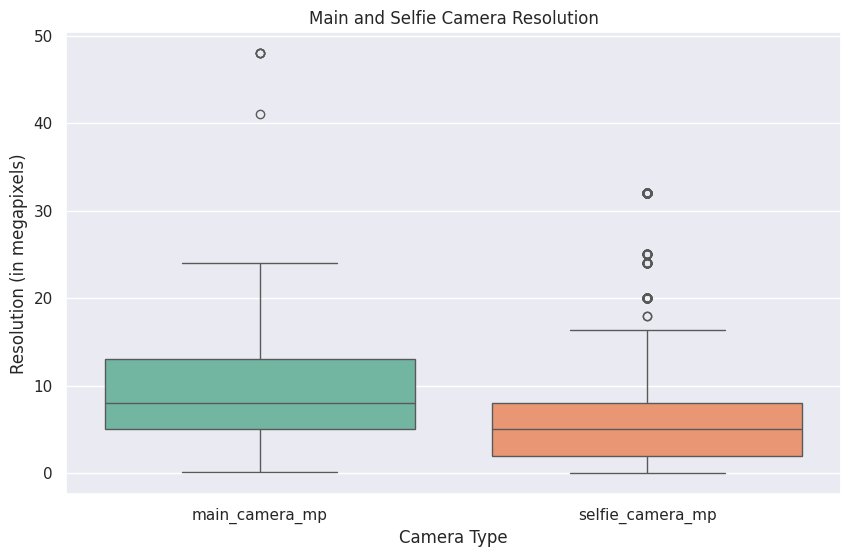

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['main_camera_mp', 'selfie_camera_mp']], palette='Set2')
plt.xlabel('Camera Type')
plt.ylabel('Resolution (in megapixels)')
plt.title('Main and Selfie Camera Resolution')
plt.show()

Observations: It would follow logically that as the technology improved over time, both camera resolutions would improve together. This can be confirmed as both selfie and main camera box plots are similar enough, despite `main_camera_mp` having many outliers.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [93]:
df.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [94]:
df1 = df.copy()
mean_selfie_camera_mp = df1['selfie_camera_mp'].mean()
df1['selfie_camera_mp'] = df1['selfie_camera_mp'].fillna(df1['selfie_camera_mp'].mean())

mean_int_memory = df1['int_memory'].mean()
df1['int_memory'] = df1['int_memory'].fillna(df1['int_memory'].mean())

mean_ram = df1['ram'].mean()
df1['ram'] = df1['ram'].fillna(df1['ram'].mean())

mean_battery = df1['battery'].mean()
df1['battery'] = df1['battery'].fillna(df1['battery'].mean())

mean_weight = df1['weight'].mean()
df1['weight'] = df1['weight'].fillna(df1['weight'].mean())

df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 0
ram                        0
battery                    0
weight                     0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

To treat the missing values, I first created a copy of the dataset. Five of the six categories; `selfie_camera_mp`, `int_memory`, `ram`, `battery`, and `weight` of missing values were at such low numbers (less than 10 as compared to the 3454 observations) so it is appropriate to take route of imputing using the mean considering the fact that they are all continuous data.

Approaching treatment of the `main_camera_mp` looks different as 179 observations were missing. Additionally, `main_camera_mp` has outliers.

In [95]:
Q1 = df1['main_camera_mp'].quantile(0.25)
Q3 = df1['main_camera_mp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['main_camera_mp'] < lower_bound) | (df1['main_camera_mp'] > upper_bound)]

print("Outliers in the main_camera_mp column:")
print(outliers)

Outliers in the main_camera_mp column:
     brand_name       os  screen_size   4g  5g  main_camera_mp  \
210         ZTE  Android        16.89  yes  no            48.0   
215         ZTE  Android        16.89  yes  no            48.0   
2097      Nokia  Windows        10.29  yes  no            41.0   
3240   Motorola  Android        15.34  yes  no            48.0   
3381   Motorola  Android        15.34  yes  no            48.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
210               16.0       128.0  8.0   5000.0   215.0          2019   
215               16.0        64.0  6.0   5000.0   215.0          2019   
2097               1.2        32.0  4.0   2000.0   158.0          2013   
3240              25.0       128.0  4.0   3600.0   165.0          2019   
3381              25.0       128.0  4.0   3600.0   165.0          2019   

      days_used  normalized_used_price  normalized_new_price  
210         336               5.668052              6.70

In [96]:
median_main_camera_mp = df1['main_camera_mp'].median()
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(df1['main_camera_mp'].median())

df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

Swiftly checked for outliers in the `main_camera_mp` prior to imputation. All missing values have been carefully treated according to their different conditions and levels of severity as proven by the above table.

In [97]:
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  
0        127              4.715100  
1        325              5.519018  
2        162              5.884631  
3        345              5.630961  
4  

In [98]:
X = sm.add_constant(X)
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


In [99]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


Now, we are preparing the data for modeling, specifically keeping in mind the goal to predict the normalized price of a used device. Outliers have been checked, missing values have been treated, the data set has been copied and manipulated, and there is no categorical data needing encoding, as the `4g` and `5g` binary columns have been formatted as 1 for "yes" and 0 for "no". Data was split into independent and dependent variables, adding a constant to the independent, then data was split 70:30, into training and testing subsets, and dummy variables were created for other categorical data. Let's build!

## EDA

- It is a good idea to explore the data once again after manipulating it.

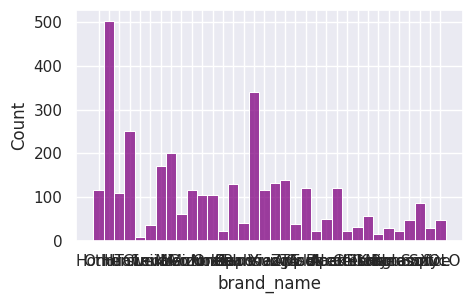

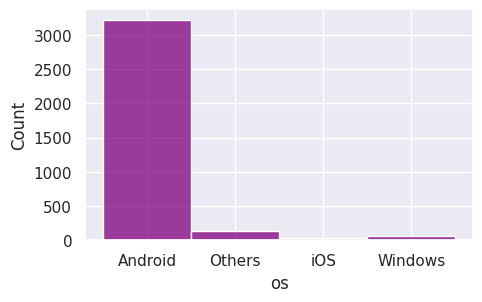

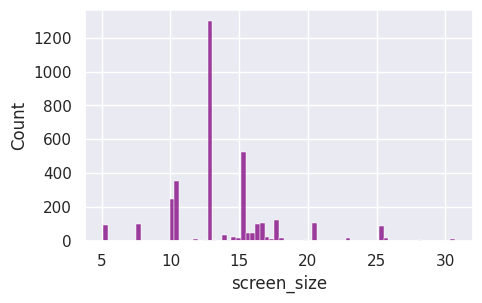

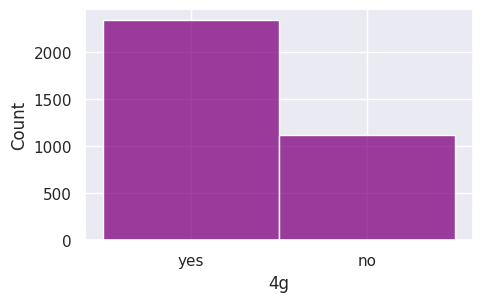

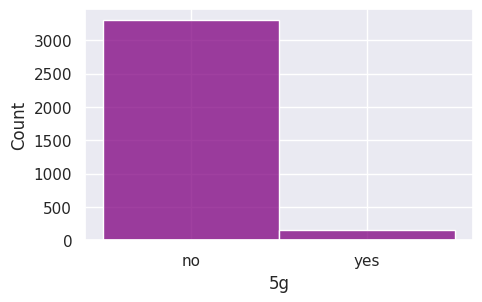

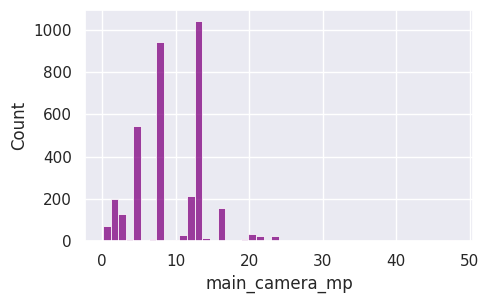

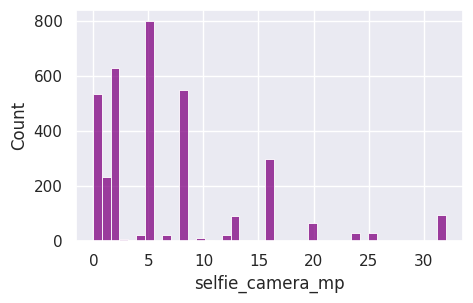

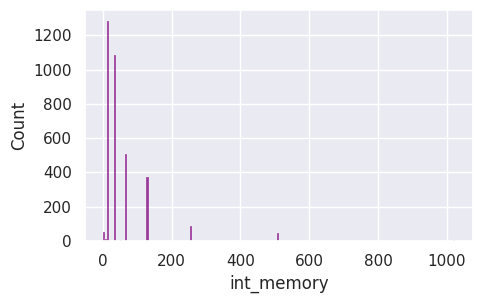

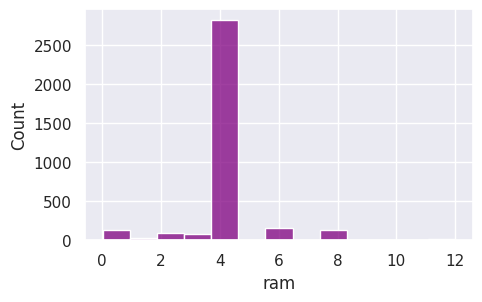

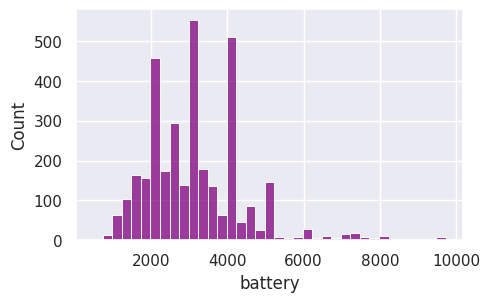

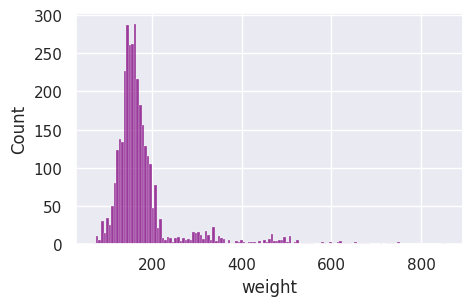

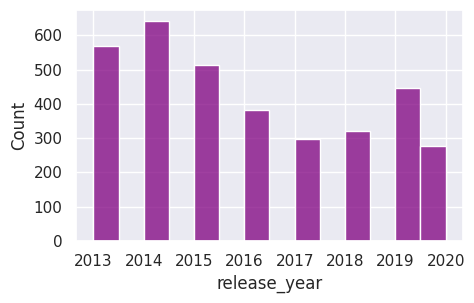

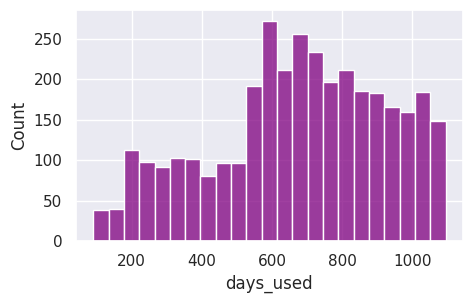

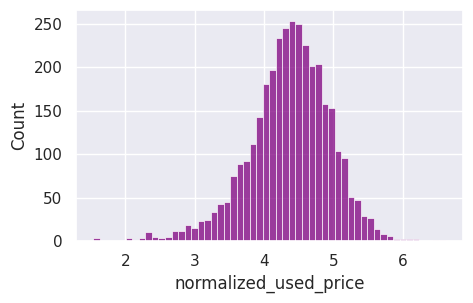

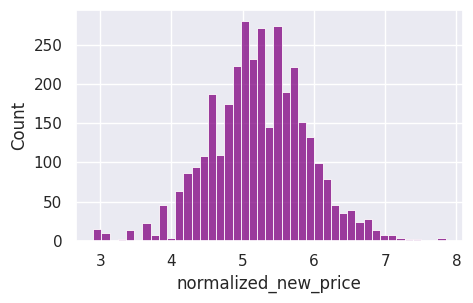

In [100]:
for i in df1.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=df1, x=i, color='purple')
    plt.show()

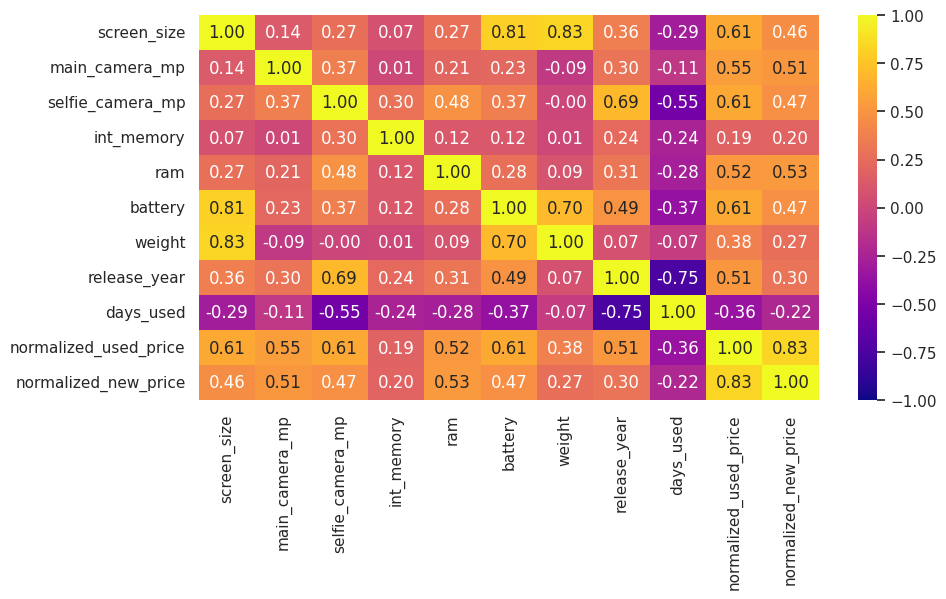

In [101]:
plt.figure(figsize=(10, 5))
sns.heatmap(df1.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="plasma")
plt.show()

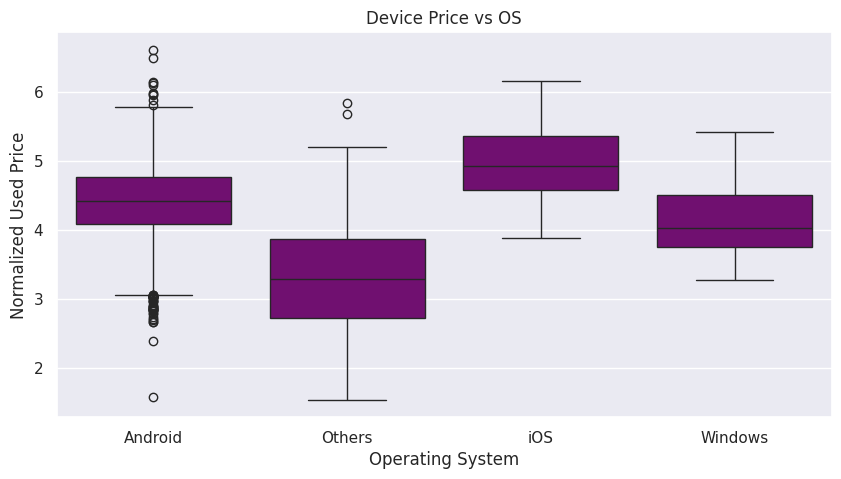

In [102]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df1, x="os", y="normalized_used_price", color="purple")
plt.xlabel('Operating System')
plt.ylabel('Normalized Used Price')
plt.title('Device Price vs OS')
plt.show()

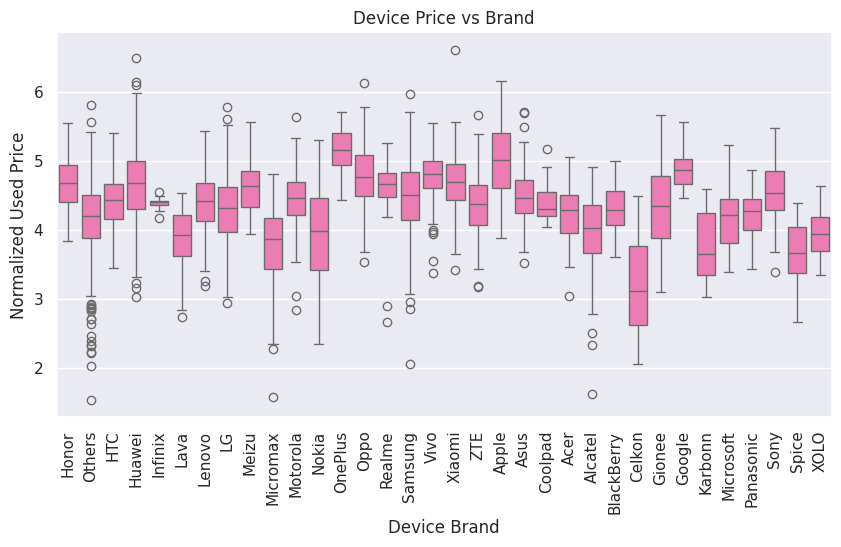

In [103]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df1, x="brand_name", y="normalized_used_price", color="hotpink")
plt.xlabel('Device Brand')
plt.ylabel('Normalized Used Price')
plt.title('Device Price vs Brand')
plt.xticks(rotation=90)
plt.show()

####Observations
After further preprocessing of the data, it is within good practice to re-conduct EDA. Although not much has changed, a few takeaways are as follows:
- `main_camera_mp` shows a slight left skew, indicating that most of the inventory is around the same level of technological advancement
- `int_memory` shows a slight left skew, suggesting that over time, not a lot of internal memory was added to devices - might not be very important to consumers
- `weight` show a heavy left skew (for lack of a better word)
-though no pattern, the release year suggests very good inventory from each year as there is no year dominating the inventory
- Both `normalized_used_price` and `normalized_new_price` are indeed normalized as histograms report very normal distribution
- Heatmap has not changed too much, with `weight` and `screen_size` with the highest correlation, and `days_used` and `release_year` with the lowest correlation
-Though Android still basically monopolizes the used device industry, it is interesting to view how the various operating systems compare in the pricing range. iOS having the highest, Android having the most spread of prices, and Other os' representing the lowest price points.

## Model Building - Linear Regression

In [104]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                           23:49:50   Log-Likelihood:                 124.04
No. Observations:                   2417   AIC:                            -150.1
Df Residuals:                       2368   BIC:                             133.6
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


###Observations:
- Adjusted R-squared= 0.842; the "grade" so to speak of our model, ranging from 0 to 1, the closer to 1 the better the fit, which is great! When compared to the R-squared of 0.845, this suggests that there is no overfitting issue
- My model has a relatively high R-squared value of 0.845, meaning approximately 84.5% of the variance in the `normalized_used_price` can be explained by the independent variables.
- F-statistic= 268.8 with a p-value= 0.00, indicates the overall model is statistically significant, meaning the independent variables have a significant effect on the dependent variable
- Many of the independent variables show statistically significant coefficients with p-values less than 0.05, including: `screen_size`, `main_camera_mp`, `selfie_camera_mp`, `ram`, `weight`, `release_year`, `normalized_new_price`, and `4g_yes`. This is exciting as it is indicative of a significant relationship with our `normalized_used_price`!

## Model Performance Check

In [105]:
from sklearn.metrics import r2_score

def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)
    adjr2 = 1 - ((1 - r2) * (predictors.shape[0] - 1) / (predictors.shape[0] - predictors.shape[1] - 1))
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = np.mean(np.abs(target - pred) / target) * 100

    return pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
(olsmodel_train_perf)

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229866,0.180313,0.84491,0.841699,4.326254


In [106]:
print("Testing Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238271,0.184038,0.842594,0.834779,4.48737


Taking a look at a few different metrics in order we can observe:

- The RMSE values are quite small (training at 0.229866 and testing at 0.238271), indicating that my model's predictions are, on average, close to the actual values

- MAE values are relatively low (training at 0.180313 and testing at 0.184038), implying very good performance in predicting our used device prices

- Putting them together, RSME and MAE testing and training values respectively are very comparable, which circles back to my earlier suggestion of overfitting not being an issue

- $R^2$ training at 0.841699 and testing at 0.834779, demonstrates my model also avoids the issue of underfitting

- When comparing $R^2$ to its Adjusted counterpart, the high values show my model's ability to explain a significant portion of the variance in our target variable

- Lastly, MAPE of 4.326254 in training and 4.48737 in testing suggest my model's ability to predict the proper used prices within about 4%

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

LR Assumptions:
1. No Multicollinearity
2. Linearity of variables
3. Independence of error terms
4. Normality of error terms
5. No Heteroscedasticity

In [107]:
def check_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif
check_vif(x_train)

,feature,VIF
0,const,3.778187e+06
1,screen_size,7.674686e+00
2,main_camera_mp,2.136517e+00
3,selfie_camera_mp,2.809021e+00
4,int_memory,1.360979e+00
5,ram,2.257823e+00
6,battery,4.073360e+00
7,weight,6.368376e+00
8,release_year,4.881817e+00
9,days_used,2.669856e+00


Per the general rule of thumb:
    
VIF = 1 → no correlation between the $k$th predictor and the remaining predictor variables

VIF ≥ 5 → moderate multicollinearity

VIF ≥ 10 → high multicollinearity

There appears to be signs of moderate multicollinearity so I'll drop only numerical columns with VIF > 5, avoiding dummy variables and the constant.

In [108]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    adj_r2 = []
    rmse = []

    for cols in high_vif_columns:
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        olsmodel = sm.OLS(target, train).fit()

        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838422,0.234673
1,weight,0.838148,0.234872


In [109]:
col_to_drop = "weight"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

vif = check_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,3.645594e+06
1,screen_size,3.588324e+00
2,main_camera_mp,2.052973e+00
3,selfie_camera_mp,2.783587e+00
4,int_memory,1.360900e+00
5,ram,2.255541e+00
6,battery,3.676480e+00
7,release_year,4.706812e+00
8,days_used,2.655959e+00
9,normalized_new_price,3.119867e+00


Now, no numerical columns show multicollinearity!

In [110]:
predictors = x_train2.copy()
cols = predictors.columns.tolist()

max_p_value = 1

while len(cols) > 0:
    x_train_aux = predictors[cols]

    model = sm.OLS(y_train, x_train_aux).fit()

    p_values = model.pvalues
    max_p_value = max(p_values)

    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'release_year', 'normalized_new_price', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Realme', 'brand_name_Xiaomi', '4g_yes']


In [111]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [112]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1141.
Date:                   Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                           23:49:52   Log-Likelihood:                 80.461
No. Observations:                   2417   AIC:                            -136.9
Df Residuals:                       2405   BIC:                            -67.44
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [113]:
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234048,0.183231,0.839215,0.838413,4.394649


In [114]:
print("Testing Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238681,0.184512,0.842051,0.8402,4.492385


* p-value: Now, I have taken care of the high p-values by dropping them as they do not significantly impact the target variable. The remaining p-values of less than 0.05 are considered to be statistically significant
* Adjusted R-squared has dropped from 0.842 to 0.838, which is reasurring to see that dropped columns did not have much effect on my model, and that my model is able to explain about 84% of the variance
* Looking at the training and testing sets, the RMSE and MAE values are comparable, demonstrating that my model does not suffer from
overfitting

In [115]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmodel2.fittedvalues
df_pred["Residuals"] = olsmodel2.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.859404,0.228084
1525,4.448399,4.621147,-0.172747
1128,4.315353,4.279585,0.035767
3003,4.282068,4.251372,0.030697
2907,4.456438,4.447037,0.009401


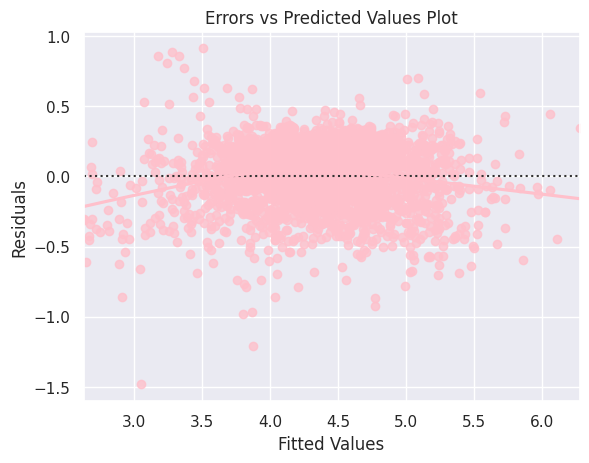

In [116]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="pink", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Errors vs Predicted Values Plot")
plt.show()

Since the above plot follows no pattern, then I say my model is linear and residuals are independent.
Therefore, the assumptions of linearity and independence are satisfied!


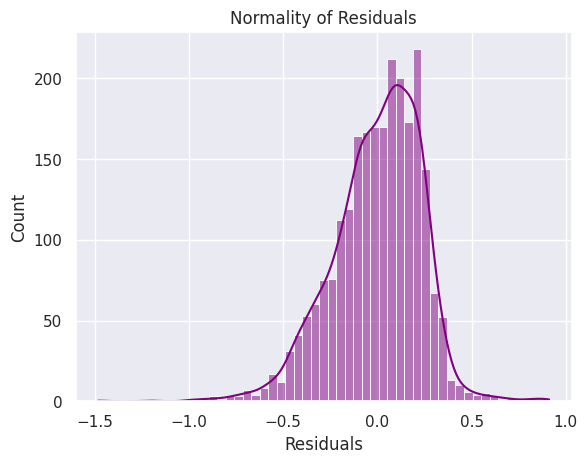

In [117]:
sns.histplot(data=df_pred, x="Residuals", kde=True, color="purple")
plt.title("Normality of Residuals")
plt.show()

Histogram of residuals has almost a bell shape

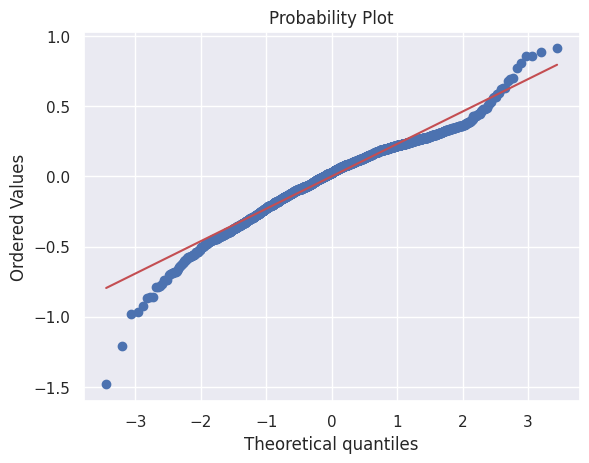

In [118]:
import pylab

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Q-Q plot above show residuals very closely follow a straight line except for the a little on the tail and a little at the very top

In [119]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9719937443733215, pvalue=2.4227570842052657e-21)

Although the Shapiro-Wilk test indicates that the residuals are not normally distributed (p-value < 0.05), visual examination of the histogram and Q-Q plot suggests that the residuals closely approximate a normal distribution. Therefore, we consider the normality assumption to be reasonably met!

In [120]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0603771942695897), ('p-value', 0.15537364858885752)]

Goldfeldquandt test for Homoscedasticity

>$H_0:$ Residuals have homoscedasticity

>$H_a:$ Residuals have heteroscedasticity

Since the resulting p-value > 0.05, this means the variance of the residuals ar4e symmetrically distributed across the regression line, and the data is considered homoscedastic. Therefore, the assumption of no heteroscedasticity is satisfied!

In [121]:
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.363629
2341,3.696103,3.942972
1913,3.592093,3.767590
688,4.306495,4.116486
650,4.522115,5.120567
2291,4.259294,4.390024
40,4.997685,5.426021
1884,3.875359,4.092176
2538,4.206631,4.052002
45,5.380450,5.311053


Closely examining the results of the predictions on the test set, my model has generated accurate predictions, demonstrating a strong alignment between the actual and predicted values



## Final Model

In [122]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1141.
Date:                   Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                           23:49:54   Log-Likelihood:                 80.461
No. Observations:                   2417   AIC:                            -136.9
Df Residuals:                       2405   BIC:                            -67.44
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

####Final Observations:
- Standard error is a reflection of the level of accuracy of coefficients, so the lower it is, the higher level of accuracy. Aside from the y-intercept, across the board standard error is reported as very low numbers!

- My model is able to explain about 84% of the variation in `normalized_used_price`. Additionally, when comparing R-squared to its adjusted counterpart, there is a 0.01 difference, demonstrating no overfitting complications. The number itself is close to 1, indicating a solid fit

- F-statistic= 1141.0 with low p-values suggest the overall model is statistically significant, in other words the independent variables have a significant effect on the dependent variable, `normalized_used_price`.

- MAPE on the testing set of the data suggests my model can predict within 4.5% of the used device prices

- Therefore, I can confidently conclude my model *olsmodel_final* is favorable not only for prediction but also for inference purposes.

## Actionable Insights and Recommendations

After completing a full data analysis for ReCell, including exploratory data analysis, visualization, statistical methods, data preprocessing, missing value imputation, employing linear regression techniques, checking assumptions including linearity, independence, homoscedasticity, normality of residuals, and absence of multicollinearity, and lastly model simplificaiton and performing evaluation metrics, I have come to the following insights.

1. To no one's surprise, `selfie_camera_mp`, `screen_size`, and `int_memory` are significant parameters. As they increase, the `normalized_new_price` increases as does `normalized_used_price`. Positive coefficients are observed from these parameters predicted in the model and prove to be helpful to focus on in order for ReCell to identify trends and preferences in the used device market.
2. Upon conducting preliminary exploratory data analysis, we discovered a moderate positive correlation between the `weight` of the phone and the `battery` capacity, indicating that as the `battery` size increases, so does the `weight`. However, subsequent analysis revealed that neither the `weight` nor the `battery` size significantly influenced the prediction of `normalized_new_price` or `normalized_used_price` by default.
3. Additionally, it was noted that approximately 90% of the phones in the dataset operated on the Android `os`, which was also deemed insignificant for prediction purposes. ReCell retailers should not worry themselves if their entire inventory is of the same operating system in preference of variety in their stock. It'll sell
4. The `normalized_new_price` shows a strong positive correlation with the `normalized_used_price`, indicating that as the price of a new device increases, so does the price of the same device in the refurbished market. This is critical for sellers to know because just because the device is used does not mean that it's value shouldn't go up following the market, as we want competitve prices that will attract cusomers and profit business
5. With each additional unit increase in the device's `screen_size`, there is a corresponding 0.0430 unit increase in the price of the refurbished device, `normalized_used_price`. Therefore, it would be advantageous for retailers to prioritize the sale of refurbished devices with larger screen sizes, as they are likely to yield higher revenue.

___